# Problem Set #7

MACS 30000, Dr. Evans

Haihao Guo

## Exercise 1

#### A

In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import sklearn
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold
from sklearn import metrics 
from sklearn.metrics import classification_report, mean_squared_error
from pylab import rcParams

import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data/strongdrink.txt')

X = df[['alco', 'malic', 'tot_phen', 'color_int']]
y = df["cultivar"]

X_train, X_test, y_train, y_test = \
  train_test_split(X, y, test_size = 0.25,random_state=20)

clf = LogisticRegression(solver='lbfgs', \
        multi_class='multinomial').fit(X_train, y_train)

pd.DataFrame({"1":np.append(clf.intercept_[0],clf.coef_[0]),
              "2":np.append(clf.intercept_[1],clf.coef_[1])},
        index=["beta_0","beta_1",'beta_2','beta_3','beta_4'])

,1,2
beta_0,-24.027621,22.780736
beta_1,1.701735,-1.466297
beta_2,-0.265788,-0.332953
beta_3,1.224101,0.663556
beta_4,0.022506,-0.922682


In [4]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.87      1.00      0.93        13
           2       1.00      0.90      0.95        21
           3       1.00      1.00      1.00        10

    accuracy                           0.95        44
   macro avg       0.96      0.97      0.96        44
weighted avg       0.96      0.95      0.96        44



In [5]:
df["cultivar"].value_counts()

2    71
1    59
3    46
Name: cultivar, dtype: int64

In [6]:
mean_squared_err = np.mean((y_test != y_pred) ** 2)
print("Mean squared error is {}".format(mean_squared_err))

Mean squared error is 0.045454545454545456


Error rates are 13\%, 0\%, and 0\%, respectively, therefore $j = 2$ and $j = 3$ is better than $j = 1$. We could thus reach the conclusion that the model predicts $j = 3$ is the model best at predicting from the fact that $j = 3$ has the highest F1 score. There are 46 observations with $j = 1$, 50 observations with $j = 2$, and 36 observations with $j = 3$. This shows us that the most accurately predicted category($j = 3$) is not the one with the most observations. The corresponding MSE is 0.045454545454545456.

#### B

In [7]:
Xvars = df[['alco', 'malic', 'tot_phen', 'color_int']].values
yvars = df['cultivar'].values
N_loo = Xvars.shape[0]
loo = LeaveOneOut()
loo.get_n_splits(Xvars)
MSE_vec = np.zeros(N_loo)

ytest = np.zeros(N_loo)
ypred = np.zeros(N_loo)

for train_index, test_index in loo.split(Xvars):
    X_train, X_test = Xvars[train_index], Xvars[test_index]
    y_train, y_test = yvars[train_index], yvars[test_index]
    ytest[test_index] = y_test
    LogReg = LogisticRegression()
    LogReg.fit(X_train, y_train)
    y_pred = LogReg.predict(X_test)
    ypred[test_index] = y_pred
    if y_test == y_pred:
        MSE_vec[test_index] = 0
    else:
        MSE_vec[test_index] = 1
    print('MSE for test set', test_index, ' is', MSE_vec[test_index])

MSE for test set [0]  is [0.]
MSE for test set [1]  is [0.]
MSE for test set [2]  is [0.]
MSE for test set [3]  is [0.]
MSE for test set [4]  is [0.]
MSE for test set [5]  is [0.]
MSE for test set [6]  is [0.]
MSE for test set [7]  is [0.]
MSE for test set [8]  is [0.]
MSE for test set [9]  is [0.]
MSE for test set [10]  is [0.]
MSE for test set [11]  is [0.]
MSE for test set [12]  is [0.]
MSE for test set [13]  is [0.]
MSE for test set [14]  is [0.]
MSE for test set [15]  is [0.]
MSE for test set [16]  is [0.]
MSE for test set [17]  is [0.]
MSE for test set [18]  is [0.]
MSE for test set [19]  is [0.]
MSE for test set [20]  is [0.]
MSE for test set [21]  is [0.]
MSE for test set [22]  is [0.]
MSE for test set [23]  is [1.]
MSE for test set [24]  is [0.]
MSE for test set [25]  is [1.]
MSE for test set [26]  is [0.]
MSE for test set [27]  is [0.]
MSE for test set [28]  is [0.]
MSE for test set [29]  is [0.]
MSE for test set [30]  is [0.]
MSE for test set [31]  is [0.]
MSE for test set [

In [8]:
MSE_loo = MSE_vec.mean()
MSE_loo_std = MSE_vec.std()
print('test estimate MSE loocv=', MSE_loo,
      '\ntest estimate MSE standard err=', MSE_loo_std)

test estimate MSE loocv= 0.07954545454545454 
test estimate MSE standard err= 0.2705882022679695


In [9]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

         1.0       0.90      0.93      0.92        59
         2.0       0.91      0.90      0.91        71
         3.0       0.96      0.93      0.95        46

    accuracy                           0.92       176
   macro avg       0.92      0.92      0.92       176
weighted avg       0.92      0.92      0.92       176



Error rates (1 - precision) for each category are 10\%, 9\%, and 4\%, respectively. The error rate for $j = 1$ is smaller and the error rates for $j = 2$ and $j = 3$ are larger compared to those from part (a). The LOOCV estimate for the test MSE is 0.07954545454545454.

#### C

In [10]:
k = 4
kf = KFold(k, random_state=10, shuffle=True)
kf.get_n_splits(Xvars)

MSE_vec_kf = np.zeros(k)

ytest = np.zeros(N_loo)
ypred = np.zeros(N_loo)

k_ind = int(0)
for train_index, test_index in kf.split(Xvars):
    X_train, X_test = Xvars[train_index], Xvars[test_index]
    y_train, y_test = yvars[train_index], yvars[test_index]
    ytest[test_index] = y_test

    LogReg = LogisticRegression()
    LogReg.fit(X_train, y_train)
    y_pred = LogReg.predict(X_test)
    ypred[test_index] = y_pred

    n = len(y_pred)
    err=[1 if y_test[i] != y_pred[i] else 0 for i in range(n)]  
    MSE_vec_kf[k_ind]=np.mean(err)
    print('MSE for test set', k_ind, ' is', MSE_vec_kf[k_ind])
    k_ind += 1

MSE for test set 0  is 0.1590909090909091
MSE for test set 1  is 0.11363636363636363
MSE for test set 2  is 0.045454545454545456
MSE for test set 3  is 0.045454545454545456


In [11]:
MSE_kf = MSE_vec_kf.mean()
MSE_kf_std = MSE_vec_kf.std()
print('test estimate MSE k-fold=', MSE_kf,
      '\ntest estimate MSE standard err=', MSE_kf_std)

test estimate MSE k-fold= 0.09090909090909091 
test estimate MSE standard err= 0.04821182598999188


In [12]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

         1.0       0.87      0.93      0.90        59
         2.0       0.91      0.87      0.89        71
         3.0       0.96      0.93      0.95        46

    accuracy                           0.91       176
   macro avg       0.91      0.91      0.91       176
weighted avg       0.91      0.91      0.91       176



Error rates are 13\%, 9\%, and 4\%, respectively. The error rate for $j = 1$ is the same and the error rates for $j = 2$ and $j = 3$ are larger compared to those from part (a). The error rate for $j = 1$ is larger and the error rates for $j = 2$ and $j = 3$ are the same compared to those from part (b). The k-fold estimate for the test MSE is 0.09090909090909091.

## Exercise 2

#### A

In [13]:
df2=pd.read_csv("data/CoolIndex.txt",names=["Age","Cool"])
df2.head()

,Age,Cool
0,11.0,10.981602
1,11.0,11.364925
2,11.0,10.190227
3,11.0,9.903725
4,11.0,8.997918


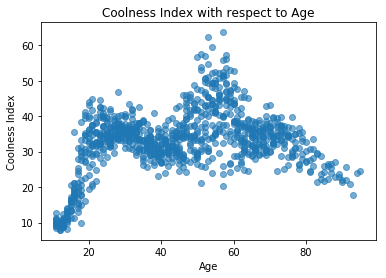

In [14]:
plt.scatter(df2['Age'],df2['Cool'],alpha=0.6)
plt.xlabel("Age")
plt.ylabel("Coolness Index")
plt.title("Coolness Index with respect to Age")
plt.show()

#### B

In [15]:
df2["g1"]=np.where((df2.Age>=11) & (df2.Age<22),1,0)
df2["g2"]=np.where((df2.Age>=22) & (df2.Age<40),1,0)
df2["g3"]=np.where((df2.Age>=40) & (df2.Age<59),1,0)
df2["g4"]=np.where((df2.Age>=59) & (df2.Age<77),1,0)
df2["g5"]=np.where((df2.Age>=77) & (df2.Age<=95),1,0)

X=df2[["g1","g2","g3","g4","g5"]]
res=sm.OLS(df2.Cool,X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   Cool   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     178.7
Date:                Wed, 26 Feb 2020   Prob (F-statistic):          3.73e-114
Time:                        00:06:47   Log-Likelihood:                -3214.5
No. Observations:                 956   AIC:                             6439.
Df Residuals:                     951   BIC:                             6463.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
g1            20.1025      0.562     35.746      0.0

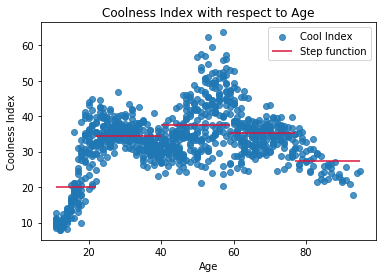

In [16]:
values = [20.1025, 34.4758, 37.6351, 35.2254, 27.2964]
plt.scatter(df2['Age'],df2['Cool'], alpha=0.8,label='Cool Index')
x_min = np.array([11, 22, 40, 59, 77])
x_max = np.array([22, 40, 59, 77, 95])
plt.hlines(values, x_min, x_max, color='crimson', label='Step function')
plt.xlabel("Age")
plt.ylabel("Coolness Index")
plt.title("Coolness Index with respect to Age")
plt.legend()
plt.show()


In [24]:
print('My estimated step function values for each bin [β1, β2, β3, β4, β5] is \[20.1025, 34.4758, 37.6351, 35.2254, 27.2964\]')

My estimated step function values for each bin [β1, β2, β3, β4, β5] is \[20.1025, 34.4758, 37.6351, 35.2254, 27.2964\]


In [23]:
print('The predicted coolness of a 73-year old from the stepwise function is', res.predict([0,0,0,1,0]))

The predicted coolness of a 73-year old from the stepwise function is [35.22540004]


#### C

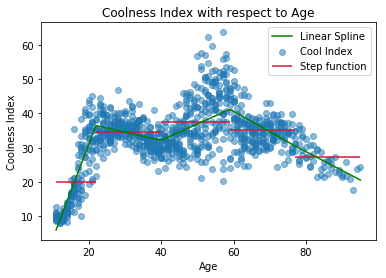

In [18]:
from scipy.interpolate import LSQUnivariateSpline
t = np.array([22,40,59,77])
df2.sort_index(0, ascending=True, inplace=True)
group = df2.groupby('Age', as_index = False).mean()
usl = LSQUnivariateSpline(group.Age.values, group.Cool.values, t, k=1)
age2 = np.linspace(11,95,100)

plt.scatter(df2['Age'],df2['Cool'], alpha=0.5,label='Cool Index')
plt.hlines(values, x_min, x_max, color='crimson', label='Step function')
plt.plot(age2, usl(age2), color='green', label='Linear Spline')
plt.xlabel("Age")
plt.ylabel("Coolness Index")
plt.title("Coolness Index with respect to Age")
plt.legend()
plt.show()


In [19]:
print('The predicted coolness index of a 73-year-old person from the linear spline is', usl(73))

The predicted coolness index of a 73-year-old person from the linear spline is 32.86784862349653


#### D

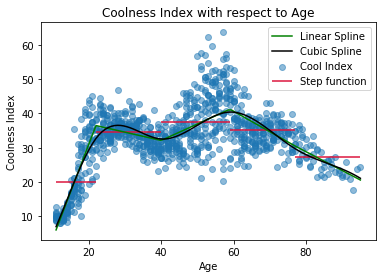

In [20]:
usl2 = LSQUnivariateSpline(group.Age.values, group.Cool.values, t, k=3)

plt.scatter(df2['Age'],df2['Cool'], alpha=0.5,label='Cool Index')
plt.hlines(values, x_min, x_max, color='crimson', label='Step function')
plt.plot(age2, usl(age2), color='green', label='Linear Spline')
plt.plot(age2, usl2(age2), 'k-', label='Cubic Spline')
plt.xlabel("Age")
plt.ylabel("Coolness Index")
plt.title("Coolness Index with respect to Age")
plt.legend()
plt.show()


In [21]:
print('The predicted coolness index of a 73-year-old person from the linear spline is', usl2(73))

The predicted coolness index of a 73-year-old person from the linear spline is 32.642301066279764
